# setting up GPU

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15867, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 15867 (delta 12), reused 20 (delta 10), pack-reused 15833 (from 1)
Receiving objects: 100% (15867/15867), 14.44 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (10678/10678), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# mounting google drive for data

In [ ]:
# mounting google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 1673696892806.jpg
'about_blank(1).PDF'
 Agriculture
 ameya-HP
'AMEYA photo.jpeg'
'Ameya Purohit'
'Braj Bhoomi Trip.gdoc'
'Certificate of Ameya Purohit (Illuminate ECell IITB 21-22).pdf'
'COA L-11 onwards.gdoc'
'Colab Notebooks'
'Compiler Design.gdoc'
 contacts.csv
 Crop_and_weed_detection
 DBMS.gdoc
'Fluxus IIT Indore Story {Ameya’s POV}.gdoc'
'Getting started.pdf'
 Harshita-Resume.gdoc
 IMG_20211109_162529-converted.pdf
 IMG_20211109_163657.jpg
 IMG_20230208_193641.jpg
 IMG-20240316-WA0006.jpg
'JEE-ADV-2021-4011036 (1).pdf'
 JEE-ADV-2021-4011036.pdf
 LICENSE
'Mathura-Vrindavan Trip Itenary .gdoc'
 ML
'My Drive'
"PAPA's Files"
 Resume-Ameya-Purohit.pdf
'wfg-fxmh-vje - Dec 5, 2023.gjam'
'zrm-jdvp-zne - Oct 23, 2023.gjam'


From github copy all file from *crop_weed_detection_training* folder and make *Agriculture* (same name requires) folder and paste.

In [ ]:
!ls /mydrive/Agriculture

backup				 crop_weed.cfg		    generate_train.py  obj.names
crop_and_weed_detection.weights  crop_weed_detection.ipynb  obj.data	       test


# Downloading dataset

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to you kaggle > account, Scroll to API section and Click Expire API Token(if you have created previously)  to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Now just run bellow cell.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
#upload kaggle.json file which you downloaded earlier
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ameyapurohit","key":"8dc0ddcf0d0b8cf757f9a21f2c7de52c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          16088        354  1.0              
abdullah0a/comprehensive-weight-change-prediction            Diet Analysis , Predict The Weight               3KB  2024-10-27 17:43:55           1055         27  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           8815        145  1.0              
jahnavipaliwal/mountains-vs-beaches-preference               Mountains vs. Beaches Preferences      

In [ ]:
!kaggle datasets download -d ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes

Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes
License(s): CC0-1.0
 97% 77.0M/79.2M [00:04<00:00, 22.8MB/s]
100% 79.2M/79.2M [00:04<00:00, 16.7MB/s]


In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
!# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip -o ../crop-and-weed-detection-data-with-bounding-boxes.zip -d data/

Archive:  ../crop-and-weed-detection-data-with-bounding-boxes.zip
  inflating: data/agri_data/data/agri_0_1009.jpeg  
  inflating: data/agri_data/data/agri_0_1009.txt  
  inflating: data/agri_data/data/agri_0_1017.jpeg  
  inflating: data/agri_data/data/agri_0_1017.txt  
  inflating: data/agri_data/data/agri_0_1018.jpeg  
  inflating: data/agri_data/data/agri_0_1018.txt  
  inflating: data/agri_data/data/agri_0_1020.jpeg  
  inflating: data/agri_data/data/agri_0_1020.txt  
  inflating: data/agri_data/data/agri_0_1024.jpeg  
  inflating: data/agri_data/data/agri_0_1024.txt  
  inflating: data/agri_data/data/agri_0_1026.jpeg  
  inflating: data/agri_data/data/agri_0_1026.txt  
  inflating: data/agri_data/data/agri_0_1028.jpeg  
  inflating: data/agri_data/data/agri_0_1028.txt  
  inflating: data/agri_data/data/agri_0_1041.jpeg  
  inflating: data/agri_data/data/agri_0_1041.txt  
  inflating: data/agri_data/data/agri_0_1053.jpeg  
  inflating: data/agri_data/data/agri_0_1053.txt  
  infla

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Agriculture/crop_weed.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd ..

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Agriculture/obj.names ./data
!cp /mydrive/Agriculture/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd ..

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Agriculture/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()

In [ ]:
!python generate_train.py

In [ ]:
# train.txt file should have to here.
!ls data/agri_data

data  train.txt


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74


--2024-11-01 04:03:34--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2024-11-01 04:03:34--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  14.6MB/s    in 12s     

2024-11-01 04:03:47 (13.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# press ctrl+shift+i than paste below code
# open console and paste below code else your runtime will crash after some time
'''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''

'\nfunction ClickConnect(){\nconsole.log("Working");\ndocument.querySelector("colab-toolbar-button#connect").click()\n}\nsetInterval(ClickConnect,60000)\n'

# Training

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/crop_weed.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 636.073975, iou_loss = 0.000000, total_loss = 636.073975 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 1831.473267, iou_loss = 0.000000, total_loss = 1831.473267 
 total_bbox = 4010, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.378421), count: 2, class_loss = 164.806046, iou_loss = 1.597549, total_loss = 166.403595 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 639.068909, iou_loss = 0.000000, total_loss = 639.068909 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 1850.151001, iou_loss = 0.000000, total_loss = 1850.151001 
 total_bbox = 4012, rewritten_bbox

In [ ]:
!ls
imShow('chart.png')

3rdparty	darknet			docker-compose.yml  json_mjpeg_streams.sh  README.md
backup		darknet53.conv.74	Dockerfile.cpu	    LICENSE		   results
build		DarknetConfig.cmake.in	Dockerfile.gpu	    Makefile		   scripts
build.ps1	darknet_images.py	generate_train.py   net_cam_v3.sh	   src
cfg		darknet.py		image_yolov3.sh     net_cam_v4.sh	   vcpkg.json
cmake		darknet_video.py	image_yolov4.sh     obj			   video_yolov3.sh
CMakeLists.txt	data			include		    package.xml		   video_yolov4.sh


AttributeError: 'NoneType' object has no attribute 'shape'

# Testing

In [ ]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=32/batch=1/' crop_weed.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' crop_weed.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!ls /mydrive/Agriculture/test

crop_1.jpeg  crop_2.txt   crop_4.jpeg  weed_1.txt   weed_3.jpeg  weed_4.txt   weed_6.jpeg
crop_1.txt   crop_3.jpeg  crop_4.txt   weed_2.jpeg  weed_3.txt	 weed_5.jpeg  weed_6.txt
crop_2.jpeg  crop_3.txt   weed_1.jpeg  weed_2.txt   weed_4.jpeg  weed_5.txt


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  

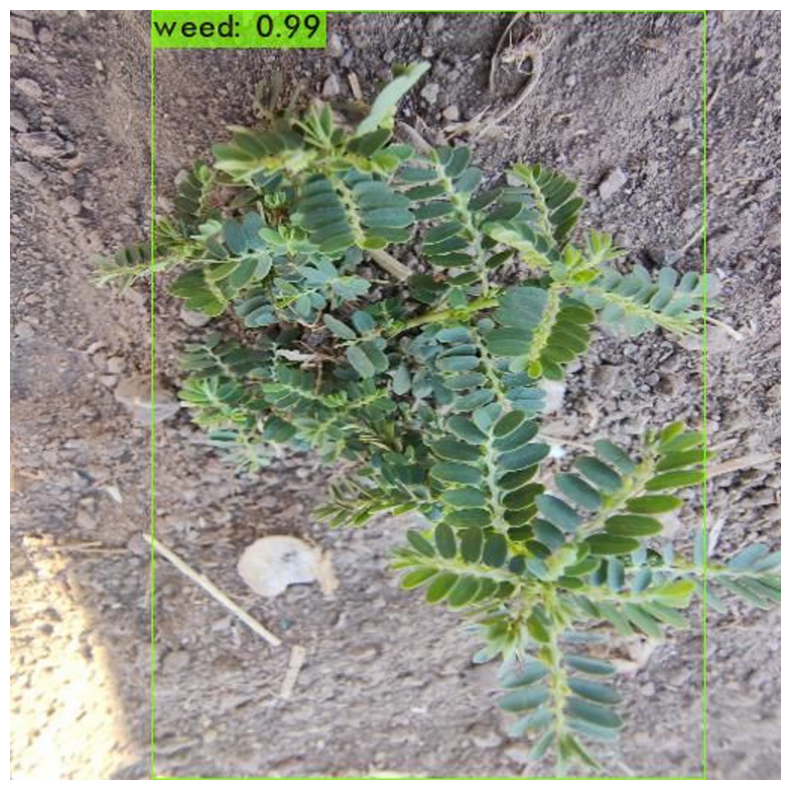

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/crop_weed.cfg /mydrive/Agriculture/crop_and_weed_detection.weights /mydrive/Agriculture/test/weed_1.jpeg  -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# Specify the path to your obj.data file
file_path = '/mydrive/Agriculture/obj.data'

# Open and read the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Print the contents to view
for line in content:
    print(line)




classes = 2

train = /content/darknet/data/agri_data/train.txt

valid = /content/darknet/data/test.txt

names = /content/darknet/data/obj.names

backup = /mydrive/Agriculture/backup/



In [ ]:
import os

# Define the directory where your test images are stored
test_dir = '/mydrive/Agriculture/test/'

# Define the path for test.txt
test_txt_path = '/content/darknet/data/test.txt'

# Create test.txt with paths to each test image
with open(test_txt_path, 'w') as test_file:
    for filename in os.listdir(test_dir):
        if filename.endswith('.jpeg') or filename.endswith('.png'):  # adjust extension if needed
            test_file.write(f"{test_dir}/{filename}\n")


In [ ]:
!./darknet detector map data/obj.data cfg/crop_weed.cfg /mydrive/Agriculture/crop_and_weed_detection.weights


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  